# PCR

A regressão por análise de componentes principais será feita utilizando o método jackknife para encontrar o número ótimo de componentes do PCA. Logo após, aplicamos o pca e fazemos a regressão para predição.

# Imports


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import cross_val_predict, KFold
from pathlib import Path

# Método Jackknife

In [2]:
def jackknife_pca(X, threshold=0.01):
    n_samples = X.shape[0]
    variances = []
    
    for i in range(n_samples):
        X_jack = np.delete(X, i, axis=0)
        pca = PCA().fit(X_jack)
        variances.append(pca.explained_variance_ratio_)
    
    variances = np.mean(variances, axis=0)
    
    for i in range(len(variances) - 1):
        if variances[i] - variances[i + 1] < threshold:
            return i + 1
    return len(variances)

# Plot and save

In [3]:
base_dir = Path().resolve().parent
dataset_save = base_dir / "Principal Components Regression"
dataset_saved = base_dir / "Processed" / "PCA"

In [4]:
def plot_pred_vs_ref(Y_true, Y_pred, Y_opt, attribute, filter):
    
    slope_pred, offset_pred = np.polyfit(Y_true, Y_pred, 1)
    rmse_pred = np.sqrt(mean_squared_error(Y_true, Y_pred))
    r2_pred = r2_score(Y_true, Y_pred)
    
    slope_opt, offset_opt = np.polyfit(Y_true, Y_opt, 1)
    rmse_opt = np.sqrt(mean_squared_error(Y_true, Y_opt))
    r2_opt = r2_score(Y_true, Y_opt)
    
    metrics_dict = pd.DataFrame({
    'Y': ['Referência', 'CV'],
    'R²': [r2_opt, r2_pred],
    'RMSE': [rmse_opt, rmse_pred],
    'Offset': [offset_opt, offset_pred],
    'Slope': [slope_opt,slope_pred]
    })
    
    plt.figure(figsize=(10, 6))

    plt.scatter(Y_true, Y_opt, color='blue', label='Reference', marker='o', alpha=0.7)

    plt.scatter(Y_true, Y_pred, color='red', label='Predicted', marker='o', alpha=0.7)
       
    plt.xlabel("Reference")
    plt.ylabel("Predicted (CV)")
    plt.title(f"{filter + " - " + attribute}: Reference vs. Predicted (CV)")
    plt.grid(True)
    plt.text(0.05, 0.95, f'Reference - Slope: {slope_opt:.2f}, Offset: {offset_opt:.2f}, RMSE: {rmse_opt:.2f}, R²: {r2_opt:.2f}\nPredicted - Slope: {slope_pred:.2f}, Offset: {offset_pred:.2f}, RMSE: {rmse_pred:.2f}, R²: {r2_pred:.2f}',
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')
    plt.show()
    
    return metrics_dict

def pred_plot(Y_predict):
    X = Y_predict['Y_pred_valid'].values.reshape(-1, 1)
    y = Y_predict['Y_valid'].values

    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    offset = model.intercept_

    # Criar pontos para a linha de regressão
    X_line = np.array([[Y_predict['Y_pred_valid'].min()], [Y_predict['Y_pred_valid'].max()]])
    y_pred_line = model.predict(X_line)

    r2 = r2_score(y, Y_predict['Y_pred_valid'])
    rmse = np.sqrt(mean_squared_error(y, Y_predict['Y_pred_valid']))

    plt.figure(figsize=(10, 6))
    plt.scatter(Y_predict['Y_pred_valid'], y, color='green', label='Dados')
    plt.plot(X_line, y_pred_line, color='blue', linestyle='--', label='Linha de Regressão')

    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Predições no Conjunto de Teste')
    plt.legend()
    plt.text(0.05, 0.95, f'Slope: {slope:.2f}\nOffset: {offset:.2f}\nR²: {r2:.2f}\nRMSE: {rmse:.2f}', 
            transform=plt.gca().transAxes, verticalalignment='top')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
    metrics_dict = pd.DataFrame({
    'Y': ['Validação'],
    'R²': [r2],
    'RMSE': [rmse],
    'Offset': [offset],
    'Slope': [slope]
    })
    
    return metrics_dict

In [5]:
plot_infos_msc = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])
plot_infos_snv = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])
plot_infos_sg = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])

def add_plot_infos(plot_infos_pre, plot_infos_df, attribute):
    if plot_infos_pre.empty:
        plot_infos_df['Attribute'] = attribute
        return plot_infos_df.copy()
    
    plot_infos_df = plot_infos_df.copy()
    plot_infos_df['Attribute'] = attribute

    plot_infos_pre = pd.concat([plot_infos_pre, plot_infos_df], ignore_index=True)

    return plot_infos_pre


# Main


-------------------------------------> MSC <-------------------------------------
-------------------------------------> MSC - SST <-------------------------------------
Número ótimo de componentes encontrado: 25 (com RMSECV = 1.2055)


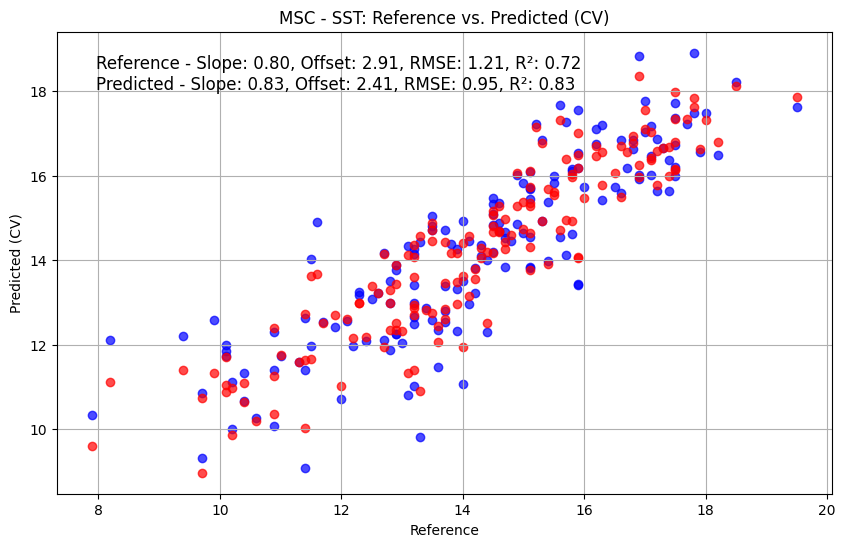

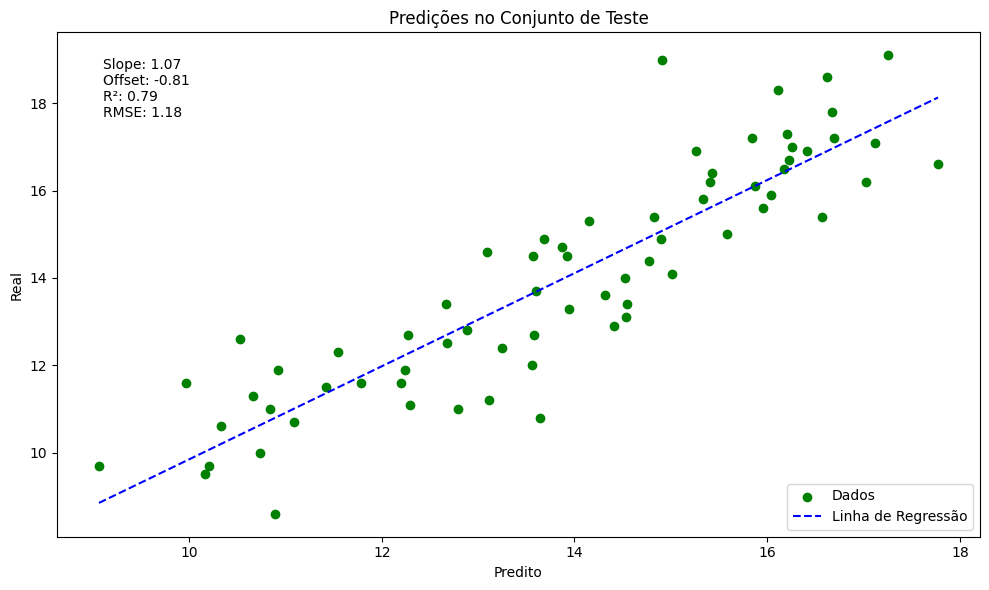

-------------------------------------> MSC - PH <-------------------------------------
Número ótimo de componentes encontrado: 23 (com RMSECV = 0.1834)


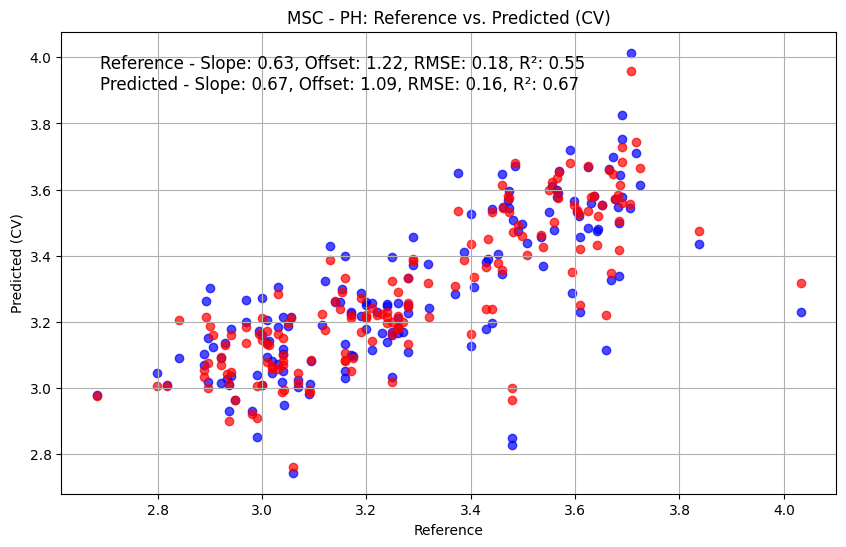

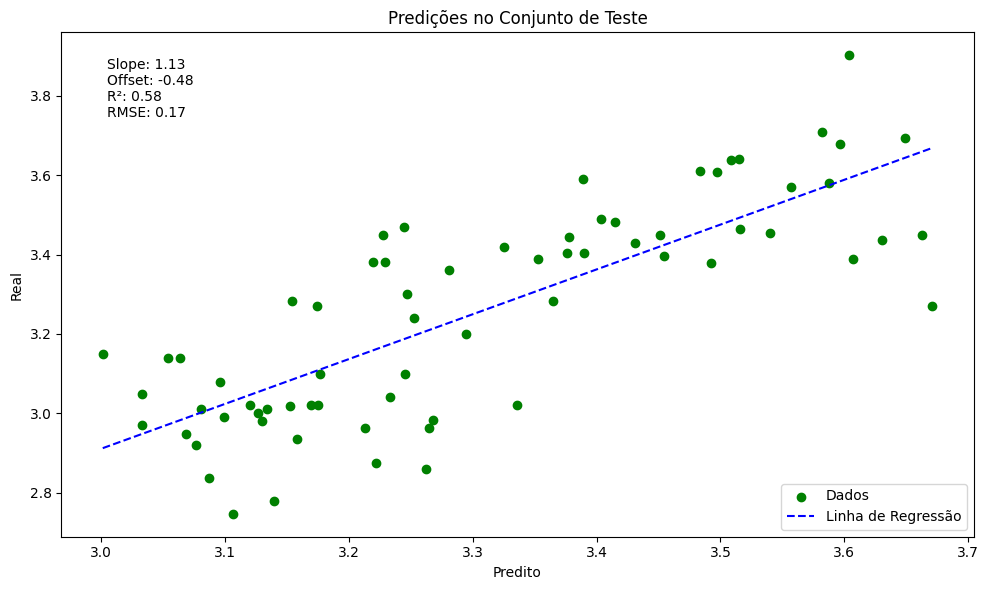

-------------------------------------> MSC - UBS (%) <-------------------------------------
Número ótimo de componentes encontrado: 30 (com RMSECV = 1.1595)


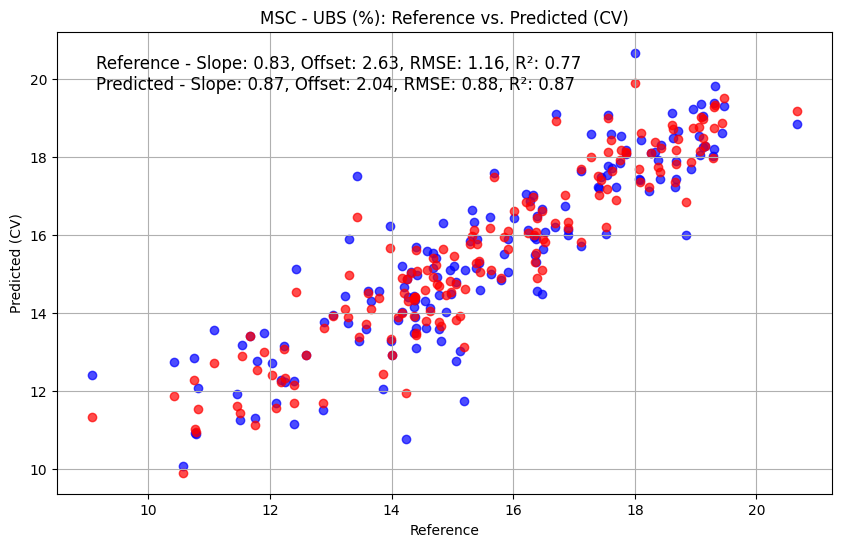

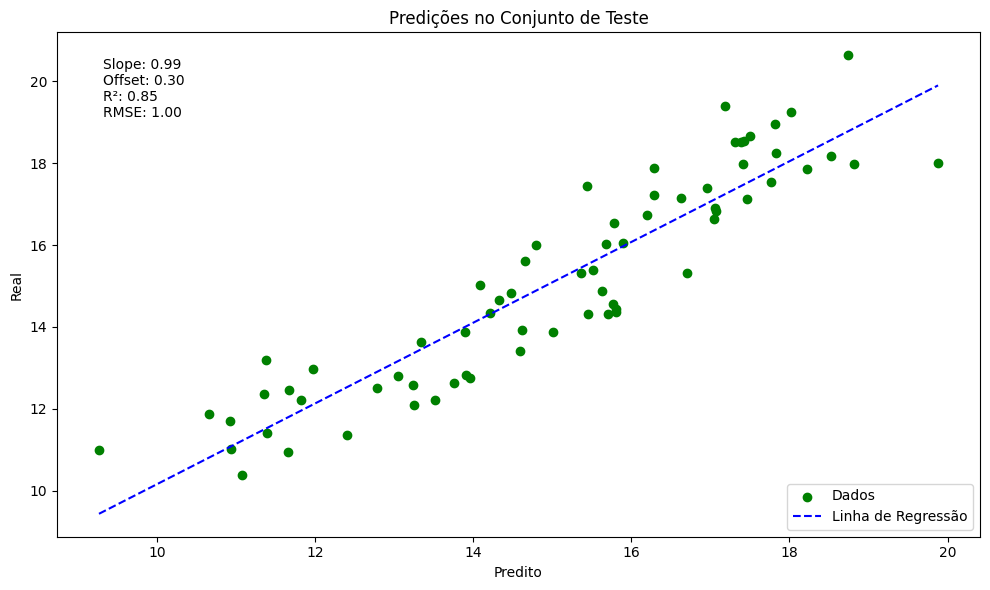

-------------------------------------> MSC - FIRMEZA (N) <-------------------------------------
Número ótimo de componentes encontrado: 6 (com RMSECV = 67.7172)


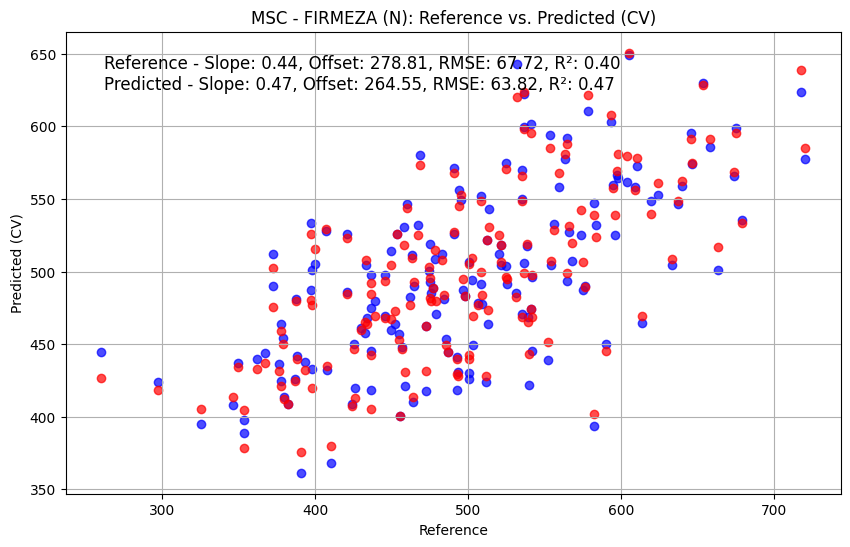

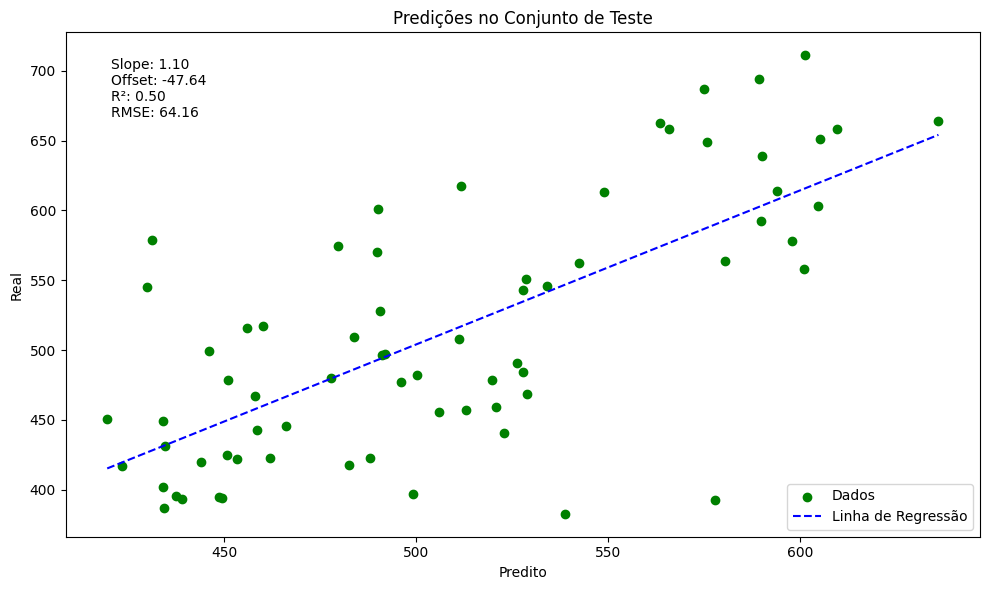

-------------------------------------> MSC - AT <-------------------------------------
Número ótimo de componentes encontrado: 21 (com RMSECV = 0.3022)


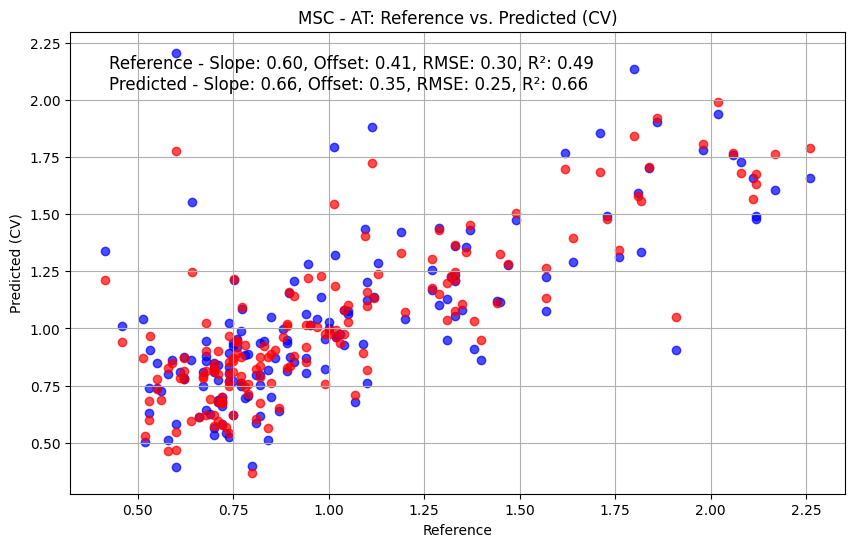

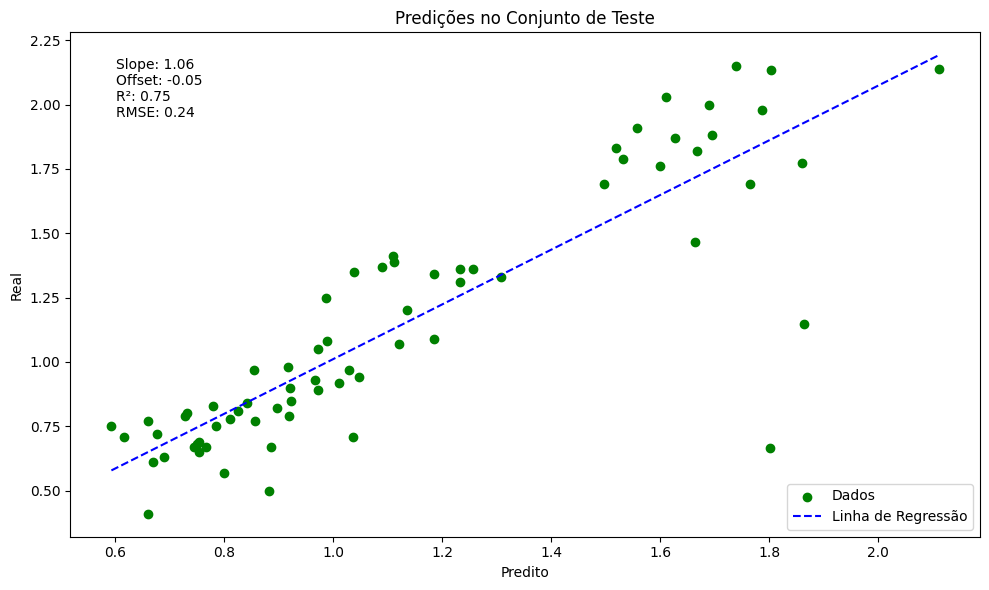

-------------------------------------> SNV <-------------------------------------
-------------------------------------> SNV - SST <-------------------------------------
Número ótimo de componentes encontrado: 25 (com RMSECV = 1.2036)


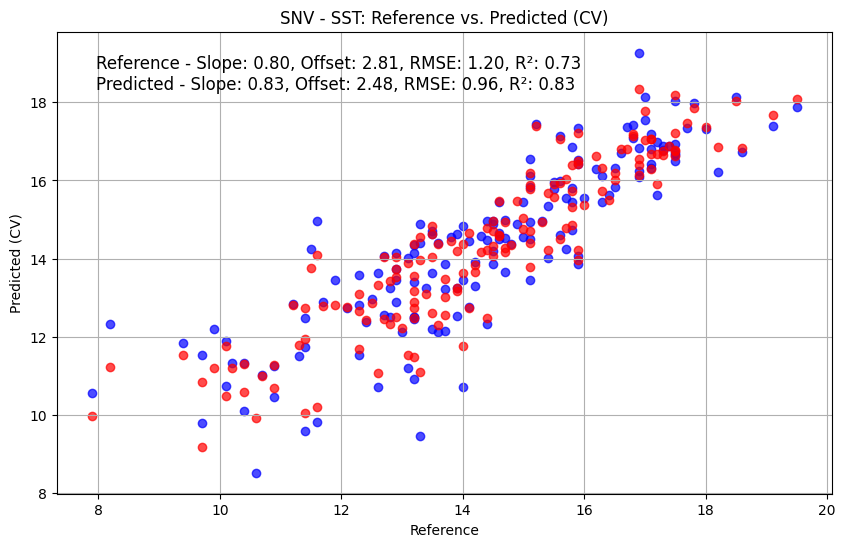

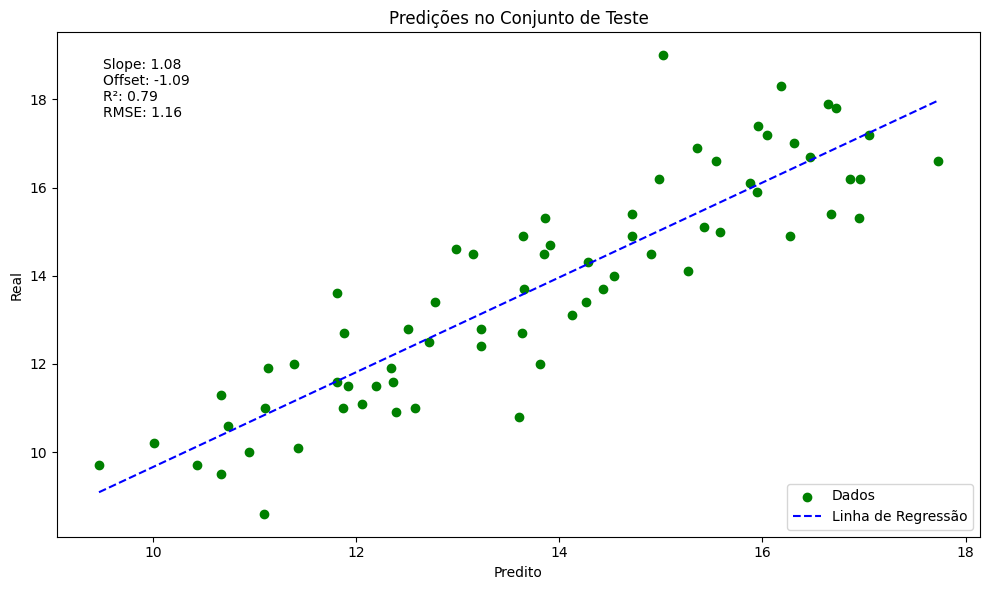

-------------------------------------> SNV - PH <-------------------------------------
Número ótimo de componentes encontrado: 23 (com RMSECV = 0.2000)


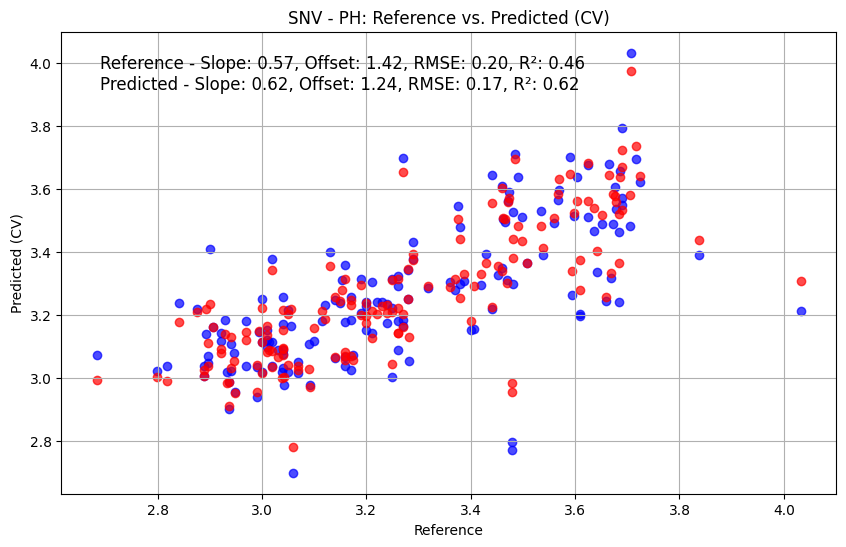

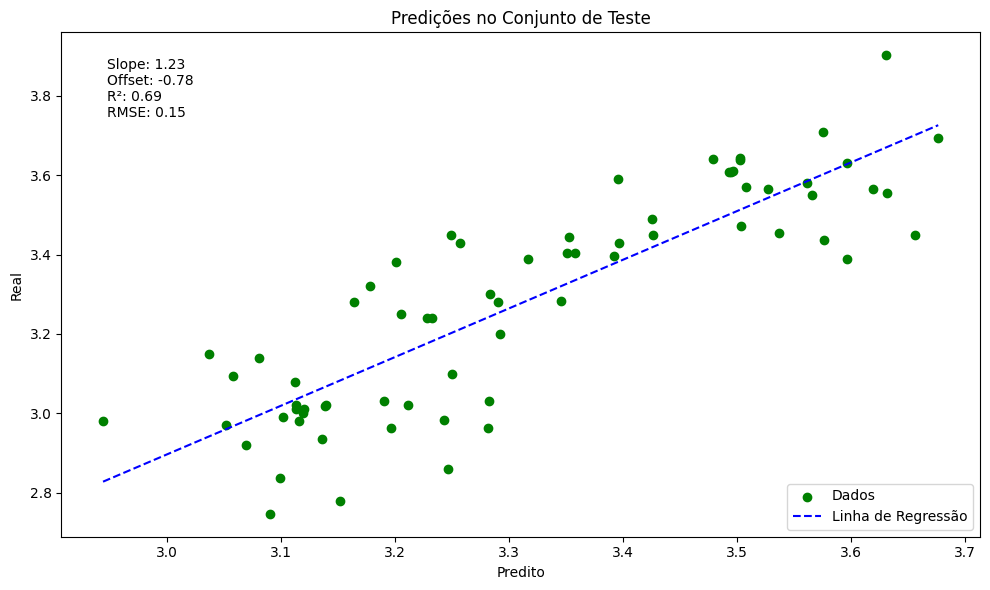

-------------------------------------> SNV - UBS (%) <-------------------------------------
Número ótimo de componentes encontrado: 18 (com RMSECV = 1.1368)


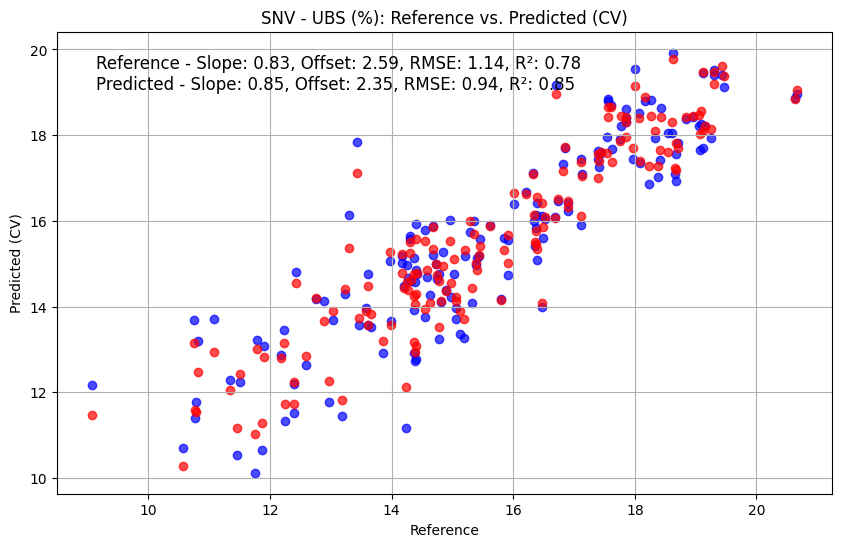

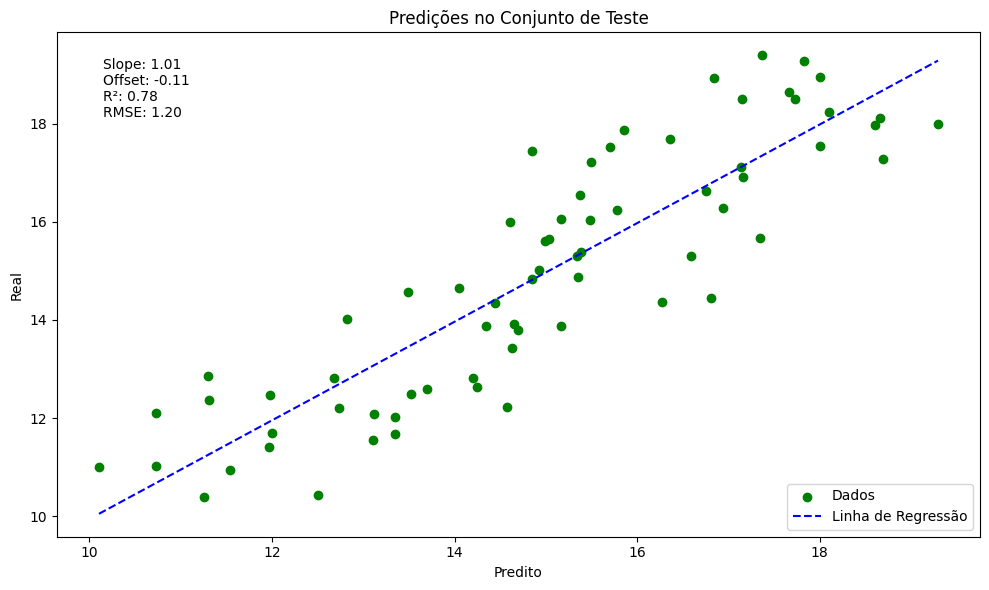

-------------------------------------> SNV - FIRMEZA (N) <-------------------------------------
Número ótimo de componentes encontrado: 6 (com RMSECV = 63.7879)


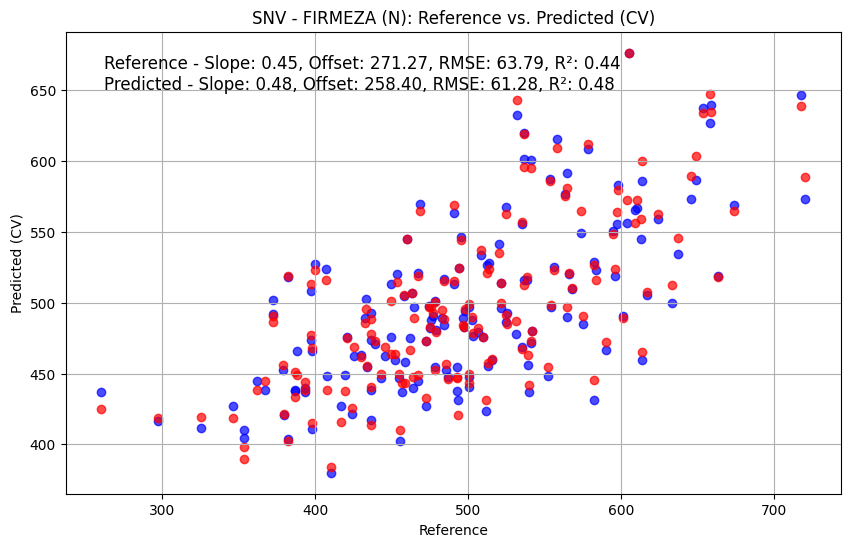

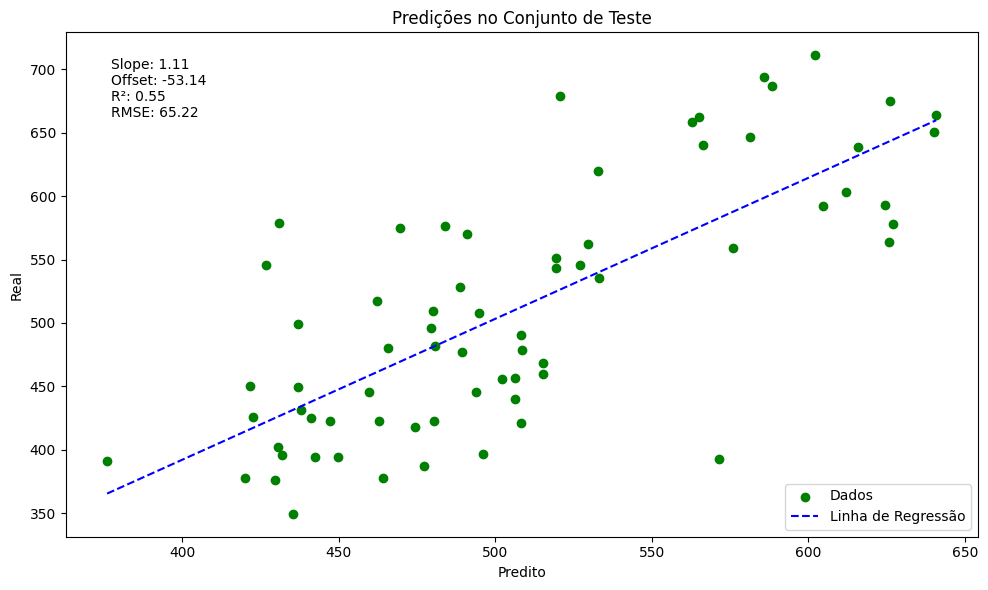

-------------------------------------> SNV - AT <-------------------------------------
Número ótimo de componentes encontrado: 20 (com RMSECV = 0.2857)


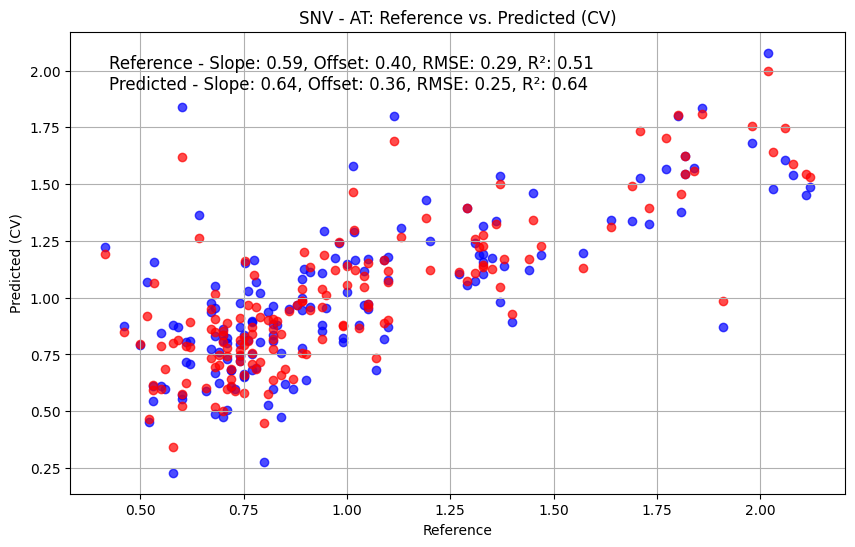

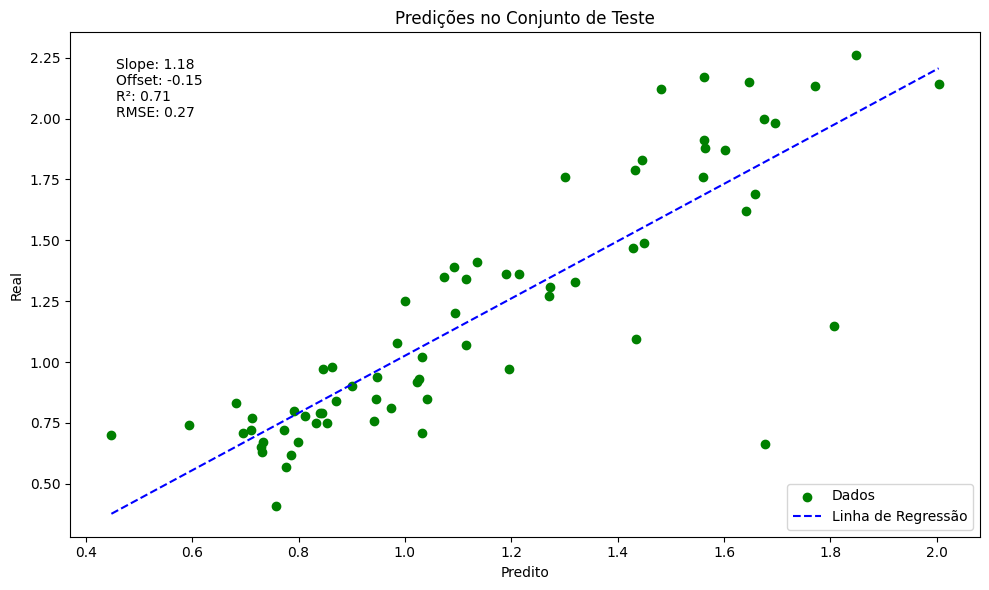

-------------------------------------> SG <-------------------------------------
-------------------------------------> SG - SST <-------------------------------------
Número ótimo de componentes encontrado: 16 (com RMSECV = 1.2682)


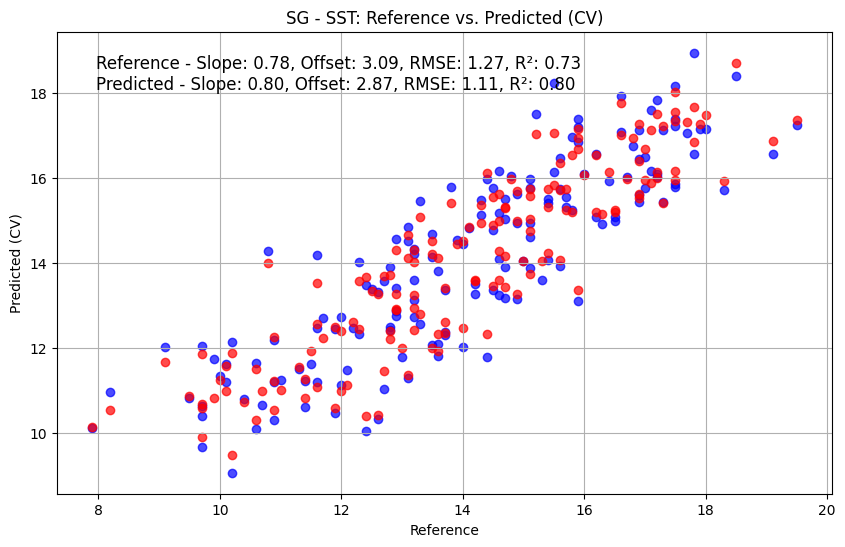

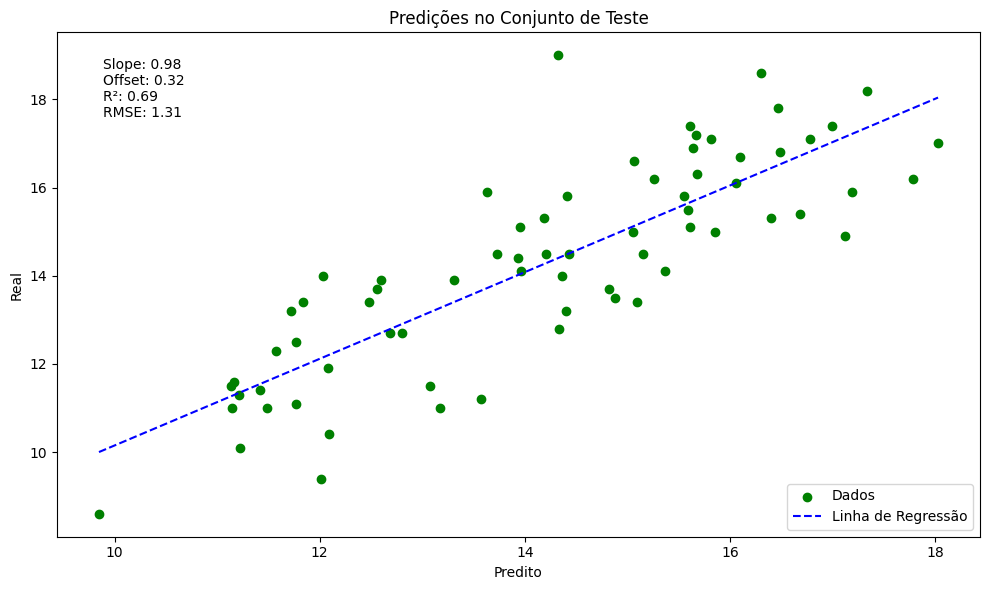

-------------------------------------> SG - PH <-------------------------------------
Número ótimo de componentes encontrado: 15 (com RMSECV = 0.1865)


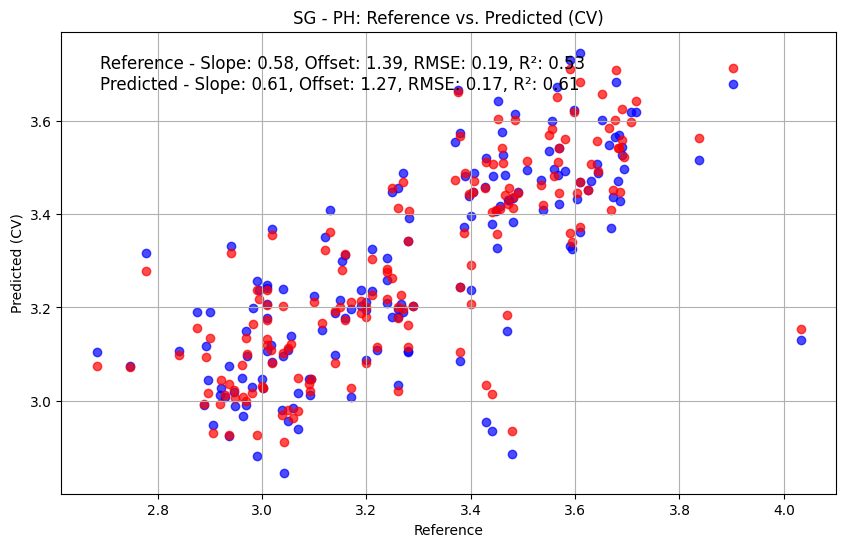

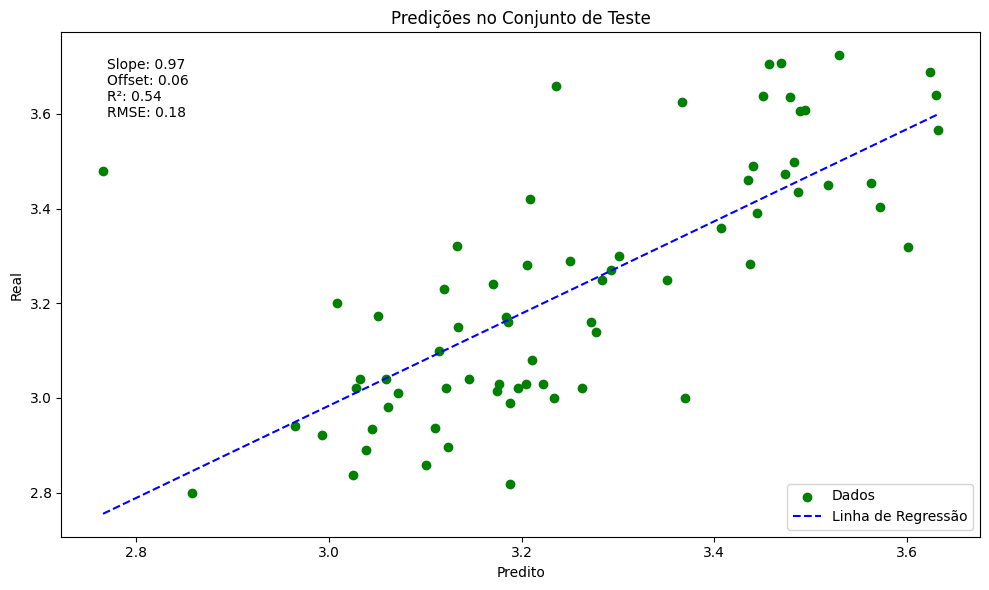

-------------------------------------> SG - UBS (%) <-------------------------------------
Número ótimo de componentes encontrado: 29 (com RMSECV = 1.2227)


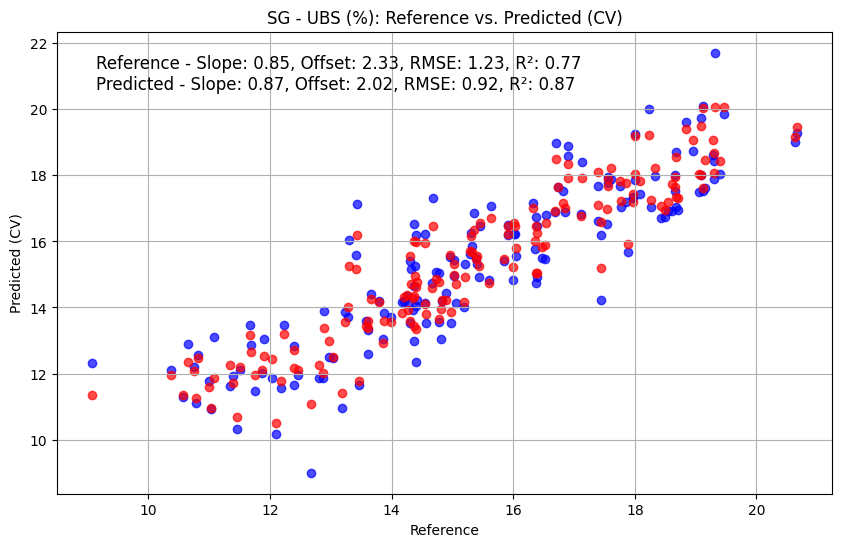

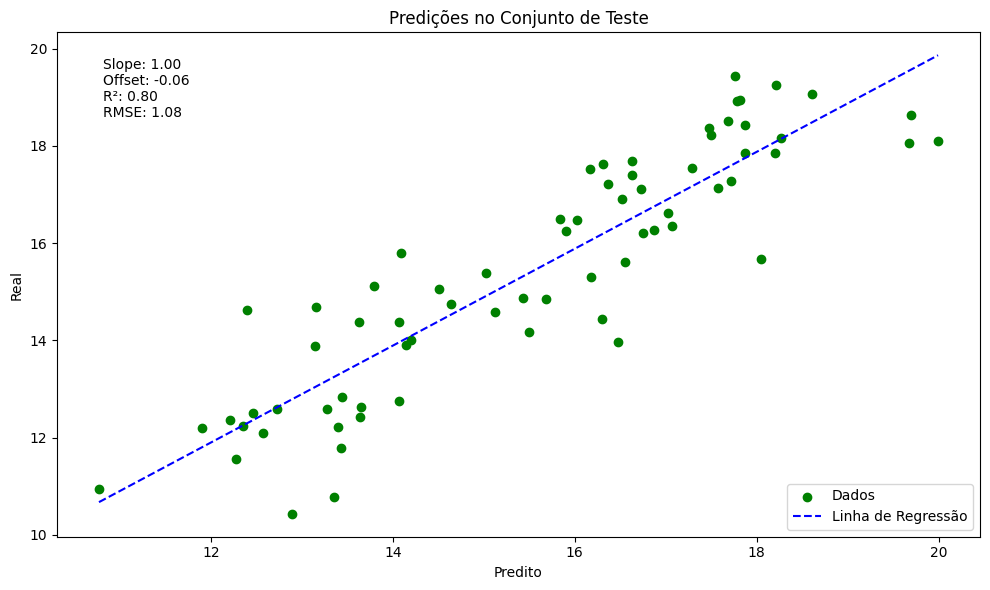

-------------------------------------> SG - FIRMEZA (N) <-------------------------------------
Número ótimo de componentes encontrado: 8 (com RMSECV = 69.8486)


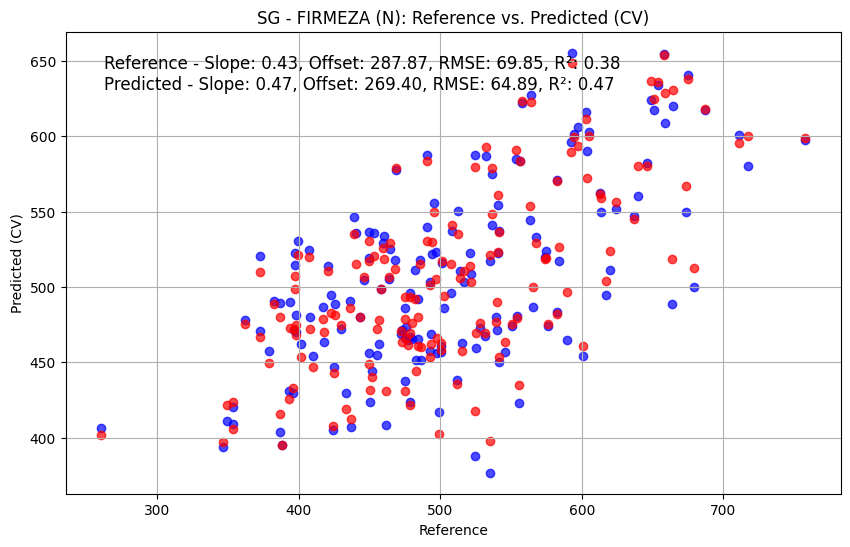

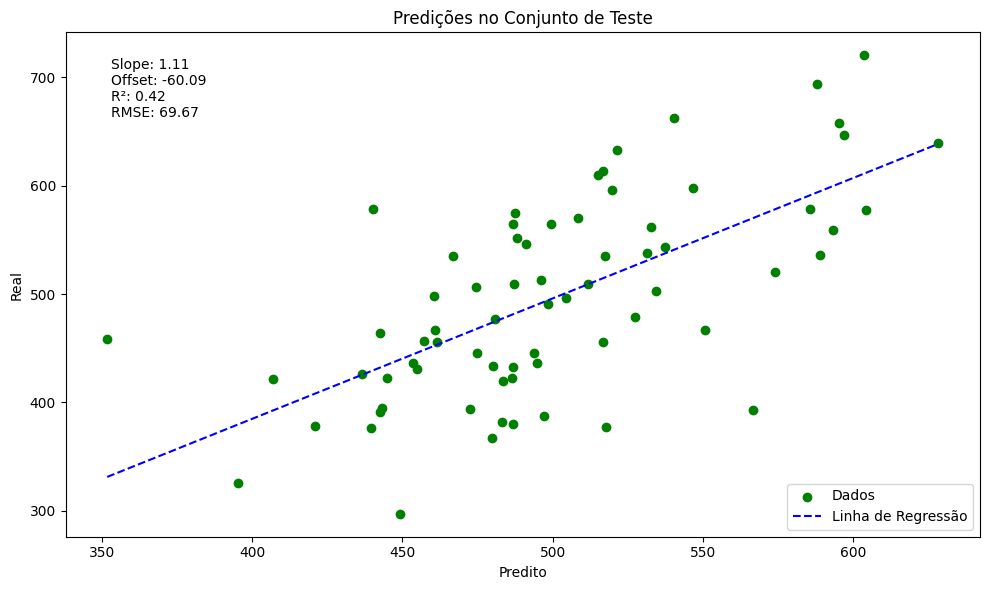

-------------------------------------> SG - AT <-------------------------------------
Número ótimo de componentes encontrado: 15 (com RMSECV = 0.3001)


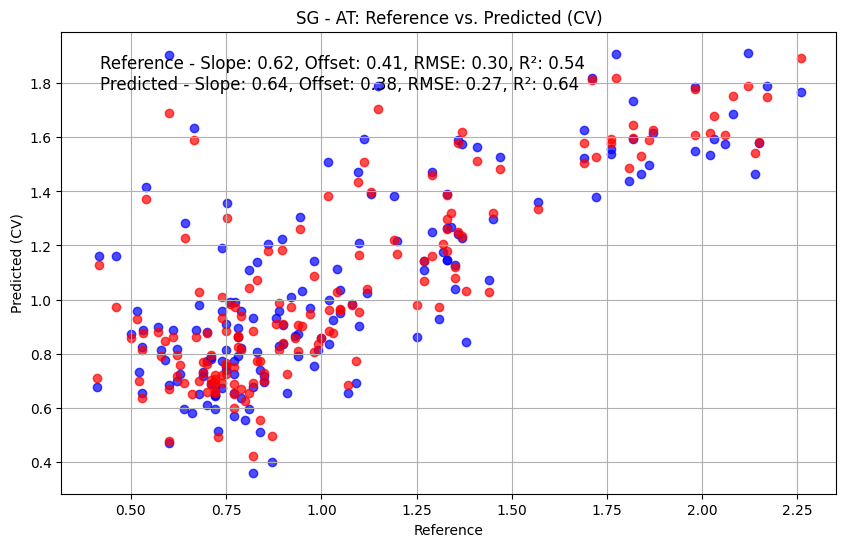

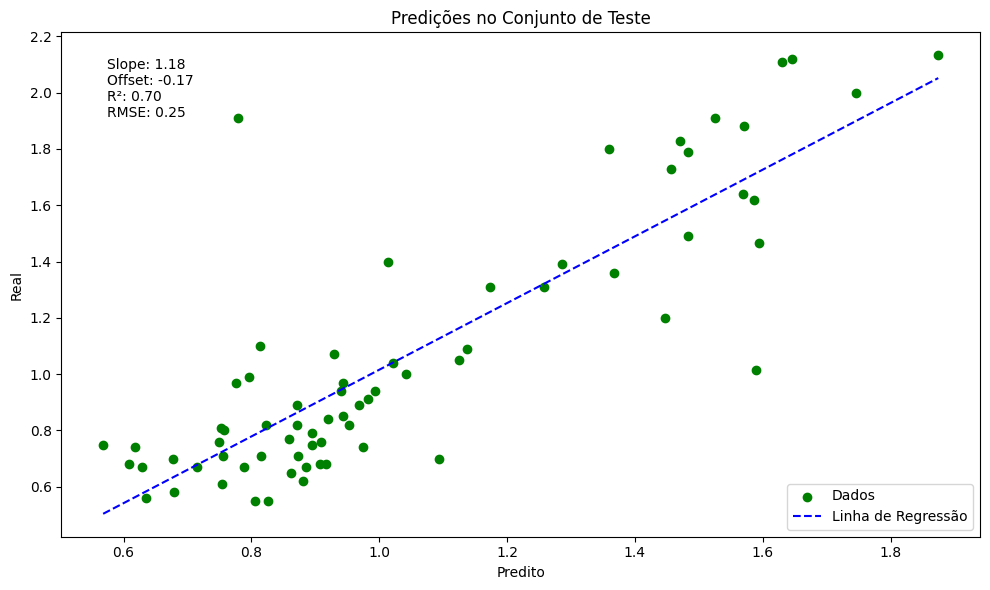

PCR concluído e métricas salvas!


In [7]:
target_variables = ["SST", "PH", "UBS (%)", "FIRMEZA (N)", "AT"]

plot_infos_msc = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])
plot_infos_snv = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])
plot_infos_sg = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])

def run_pcr(filter_name):
    print (f"-------------------------------------> {filter_name} <-------------------------------------")
    global plot_infos_msc, plot_infos_snv, plot_infos_sg  
    
    calib_path = os.path.join(dataset_saved, f"{filter_name}_processed_calibracao.xlsx")
    valid_path = os.path.join(dataset_saved, f"{filter_name}_processed_validacao.xlsx")

    if not os.path.exists(calib_path) or not os.path.exists(valid_path):
        print(f"Arquivos para {filter_name} não encontrados!")
        return
    
    df_calib = pd.read_excel(calib_path)
    df_valid = pd.read_excel(valid_path)

    X_calib_raw = df_calib.iloc[:, 6:].values
    X_valid_raw = df_valid.iloc[:, 6:].values

    # Use RobustScaler (mais resistente a outliers)
    scaler = RobustScaler()
    
    # Para usar o StandardScaler, comente a linha acima e descomente a linha abaixo
    # scaler = StandardScaler()

    # Ajuste o scaler SOMENTE com os dados de calibração
    scaler.fit(X_calib_raw)

    # Transforme ambos os conjuntos com o scaler já ajustado
    X_calib = scaler.transform(X_calib_raw)
    X_valid = scaler.transform(X_valid_raw)

    n_components = jackknife_pca(X_calib)
    pca = PCA(n_components=n_components).fit(X_calib)

    X_calib_pca = pca.transform(X_calib)
    X_valid_pca = pca.transform(X_valid)

    for attribute in target_variables:
        print (f"-------------------------------------> {filter_name} - {attribute} <-------------------------------------")
        Y_calib = df_calib[attribute].values
        Y_valid = df_valid[attribute].values

        rmsecv_scores = []
        # Define um número máximo de componentes para testar (ex: 30, ou min(forma do X))
        max_pcs = min(30, X_calib.shape[0] - 1, X_calib.shape[1] - 1) 

        for n_pcs in range(1, max_pcs + 1):
            # A cada iteração, testamos um número diferente de componentes
            pca = PCA(n_components=n_pcs)
            X_calib_pca_loop = pca.fit_transform(X_calib)
            
            # Realiza a validação cruzada com o número atual de componentes
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            Y_cv_loop = cross_val_predict(LinearRegression(), X_calib_pca_loop, Y_calib, cv=kf)
            
            # Calcula o erro (RMSECV) e o armazena
            rmsecv = np.sqrt(mean_squared_error(Y_calib, Y_cv_loop))
            rmsecv_scores.append(rmsecv)

        # O número ótimo é aquele que resultou no menor RMSECV.
        # Adicionamos +1 porque os índices da lista começam em 0 (n_pcs=1 é o índice 0)
        optimal_n_components = np.argmin(rmsecv_scores) + 1
        print(f"Número ótimo de componentes encontrado: {optimal_n_components} (com RMSECV = {min(rmsecv_scores):.4f})")
        
        # Agora, criamos o modelo PCA final com o número de componentes otimizado
        final_pca = PCA(n_components=optimal_n_components)
        X_calib_pca_final = final_pca.fit_transform(X_calib)
        
        # IMPORTANTE: Usamos o mesmo `final_pca` (treinado na calibração) para transformar a validação
        X_valid_pca_final = final_pca.transform(X_valid)

        # Treina o modelo de regressão linear final
        model = LinearRegression()
        model.fit(X_calib_pca_final, Y_calib)
        
        Y_pred_calib = model.predict(X_calib_pca_final)
        Y_pred_valid = model.predict(X_valid_pca_final)

        # Refazemos a validação cruzada apenas para o plot, com o modelo ótimo
        Y_cv_final = cross_val_predict(LinearRegression(), X_calib_pca_final, Y_calib, cv=KFold(n_splits=5, shuffle=True, random_state=42))

        df_val = pd.DataFrame({'Y_valid': Y_valid, 'Y_pred_valid': Y_pred_valid})

        # Suas funções de plot e métricas (sem alterações)
        metrics_df_cal = plot_pred_vs_ref(Y_calib, Y_pred_calib, Y_cv_final, attribute, filter_name)
        metrics_df_val = pred_plot(df_val)
        metrics_df = pd.concat([metrics_df_cal, metrics_df_val], ignore_index=True)

        if filter_name == "MSC":
            plot_infos_msc = add_plot_infos(plot_infos_msc, metrics_df, attribute)
        elif filter_name == "SNV":
            plot_infos_snv = add_plot_infos(plot_infos_snv, metrics_df, attribute)
        elif filter_name == "SG":
            plot_infos_sg = add_plot_infos(plot_infos_sg, metrics_df, attribute)

for filter_type in ["MSC", "SNV", "SG"]:
    run_pcr(filter_type)

plot_infos_msc.to_excel(os.path.join(dataset_save, "PCR_metrics_MSC.xlsx"), index=False)
plot_infos_snv.to_excel(os.path.join(dataset_save, "PCR_metrics_SNV.xlsx"), index=False)
plot_infos_sg.to_excel(os.path.join(dataset_save, "PCR_metrics_SG.xlsx"), index=False)

print("PCR concluído e métricas salvas!")
